# Metrics of th breast cancer dataset using different optimizers

In [2]:
import numpy as np
import joblib as jb
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neural_network import MLPClassifier
from neuralNetwork.perceptron_qpso import perceptron 
from neuralNetwork.perceptron_pso import perceptron_pso
from neuralNetwork.perceptron_pso_bound import perceptron_pso_bound  

In [3]:
#-----------------------
# Breast Dataset
#-----------------------

data = load_breast_cancer()
X_org = data.data
y_org = data.target
print('Shape of X: ', X_org.shape)
print('Shape of y: ', y_org.shape)

# normalize data (0,1)
t = MinMaxScaler()
t.fit(X_org)
X_org = t.transform(X_org)

X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_org, y_org, test_size=0.2, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

# Global variables
X_sample = len(X_train_bal)
X_input = len(X_train_bal[1])
X_class = len(np.unique(y_train_bal))

X_train = X_train_bal
y_train = y_train_bal
X_test = X_test_bal
y_test = y_test_bal


Shape of X:  (569, 30)
Shape of y:  (569,)
Training target statistics: Counter({1: 292, 0: 163})
Testing target statistics: Counter({1: 65, 0: 49})


## QDPSO

### All training

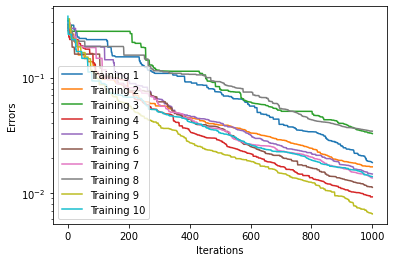

In [4]:
y_qdpso = np.load('qdpso_bc_metric_113_100_1000_30.npy')

x_qdpso = np.array(range(len(y_qdpso[0])))

for i in range(len(y_qdpso)):
    lab = "Training " + str(i+1)
    plt.plot(x_qdpso, y_qdpso[i], label = lab)
#plt.title("The Loss of QDPSO During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.show()

In [5]:
qdpso_cost = []
for i in range(len(y_qdpso)):
    qdpso_cost.append(y_qdpso[i][len(y_qdpso[0]) - 1])

qdpso_cost = np.array(qdpso_cost)
mean_qdpso = np.mean(qdpso_cost)
std_qdpso = np.std(qdpso_cost)
worst_qdpso = np.max(qdpso_cost)
best_qdpso = np.min(qdpso_cost) 
print("Worst: ", worst_qdpso, " Mean: ", mean_qdpso, ' Best: ', best_qdpso, " Std: ", std_qdpso)
print("Best loss during the training in: ", (qdpso_cost.tolist()).index(best_qdpso) + 1)


Worst:  0.03427294276881736  Mean:  0.017099937432526215  Best:  0.006577118030198179  Std:  0.008811022812404182
Best loss during the training in:  9


### Best training

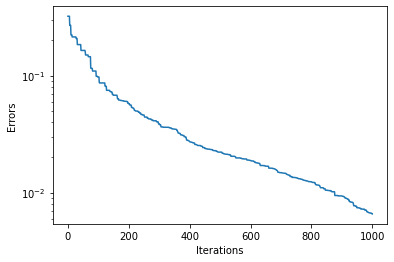

In [6]:
y_qdpso_best = y_qdpso[(qdpso_cost.tolist()).index(best_qdpso)]
x_qdpso_best = np.array(range(len(y_qdpso_best)))
plt.plot(x_qdpso_best, y_qdpso_best)
#plt.title("The Best Loss of QDPSO Durinng the Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.yscale('log')
plt.show()


### Confusion matrix

In [7]:
qdpso_model_load = np.load('qdpso_bc_gBest_113_100_1000_30.npy')
nn_qdpso = perceptron(X_sample, X_input, X_class)
y_test_qdpso = np.argmax(nn_qdpso.forward(X_test, qdpso_model_load), axis=1)
cf_matrix_qdpso = confusion_matrix(y_test, y_test_qdpso)
print(cf_matrix_qdpso)
print("F1 score weighted: ", f1_score(y_test, y_test_qdpso, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_qdpso, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_qdpso, average='weighted'))

[[48  1]
 [ 1 64]]
F1 score weighted:  0.9824561403508771
Recall score weighted:  0.9824561403508771
Precision score weighted:  0.9824561403508771


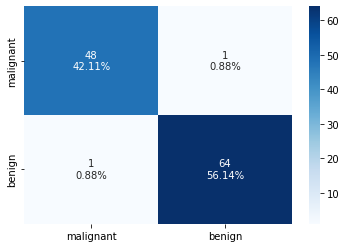

In [8]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_qdpso.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_qdpso.flatten()/np.sum(cf_matrix_qdpso)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_qdpso, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with QDPSO\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## PSO

### All training

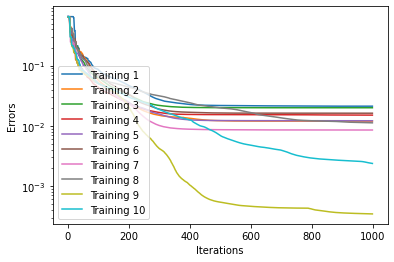

In [9]:

y_pso = np.load('pso_bc_metric_113_100_1000_30.npy')
y_pso.shape

x_pso = np.array(range(len(y_pso[0])))

for i in range(len(y_pso)):
    lab = "Training " + str(i+1)
    plt.plot(x_pso, y_pso[i], label = lab)

#plt.title("The Loss of PSO During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.show()

In [10]:
pso_cost = []
for i in range(len(y_pso)):
    pso_cost.append(y_pso[i][len(y_pso[0]) - 1])
#print(y_qdpso[0])
#print(qdpso_cost)
pso_cost = np.array(pso_cost)
mean_pso = np.mean(pso_cost)
std_pso = np.std(pso_cost)
worst_pso = np.max(pso_cost)
best_pso = np.min(pso_cost) 
print("Worst: ", worst_pso, " Mean: ", mean_pso, " Best: ", best_pso,"Std: ", std_pso)
print("Best loss during the training in: ", (pso_cost.tolist()).index(best_pso) + 1)

Worst:  0.021241819895029622  Mean:  0.011925477612218589  Best:  0.0003451684617087254 Std:  0.006465055936700308
Best loss during the training in:  9


### Best training

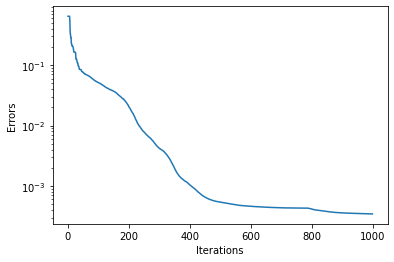

In [11]:
y_pso_best = y_pso[(pso_cost.tolist()).index(best_pso)]
x_pso_best = np.array(range(len(y_pso_best)))
plt.plot(x_pso_best, y_pso_best)
#plt.title("The Best Loss of PSO Durinng the Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.yscale('log')
plt.show()

### Confusion Matrix

In [36]:
pso_model_load = np.load('pso_bc_gBest_113_100_1000_30.npy')
nn_pso = perceptron_pso(X_sample, X_input, X_class)
y_test_pso = np.argmax(nn_pso.forward(X_test, pso_model_load), axis=1)
cf_matrix_pso = confusion_matrix(y_test, y_test_pso)
print(cf_matrix_pso)
print("F1 score weighted: ", f1_score(y_test, y_test_pso, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_pso, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_pso, average='weighted'))

[[48  1]
 [ 1 64]]
F1 score weighted:  0.9824561403508771
Recall score weighted:  0.9824561403508771
Precision score weighted:  0.9824561403508771


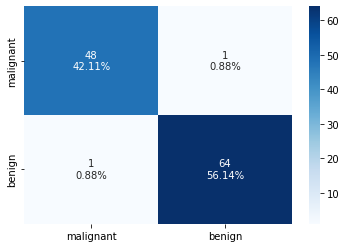

In [37]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_pso.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_pso.flatten()/np.sum(cf_matrix_pso)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_pso, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with PSO\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## PSO_Bound

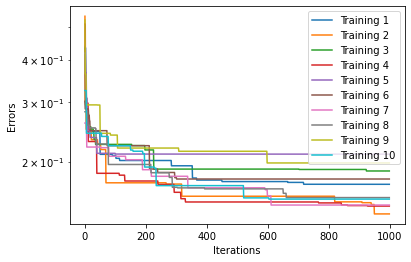

In [14]:
y_pso_bound = np.load('pso_bound_bc_metric_113_100_1000_30.npy')
y_pso_bound.shape

x_pso_bound = np.array(range(len(y_pso_bound[0])))

for i in range(len(y_pso_bound)):
    lab = "Training " + str(i+1)
    plt.plot(x_pso_bound, y_pso_bound[i], label = lab)

#plt.title("The Loss of PSO_bound During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.show()

In [15]:
pso_bound_cost = []
for i in range(len(y_pso_bound)):
    pso_bound_cost.append(y_pso_bound[i][len(y_pso_bound[0]) - 1])

pso_bound_cost = np.array(pso_bound_cost)
mean_pso_bound = np.mean(pso_bound_cost)
std_pso_bound = np.std(pso_bound_cost)
worst_pso_bound = np.max(pso_bound_cost) 
best_pso_bound = np.min(pso_bound_cost)
print("Worst: ", worst_pso_bound, " Mean: ", mean_pso_bound," Best: ", best_pso_bound, " Std: ", std_pso_bound)
print("Best loss during the training in: ", (pso_bound_cost.tolist()).index(best_pso_bound) + 1)

Worst:  0.21054205851157679  Mean:  0.16956226312078  Best:  0.14035226707176018  Std:  0.02240697663231865
Best loss during the training in:  2


### Best training

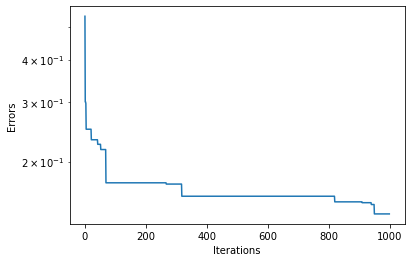

In [16]:
y_pso_bound_best = y_pso_bound[(pso_bound_cost.tolist()).index(best_pso_bound)]
x_pso_bound_best = np.array(range(len(y_pso_bound_best)))
plt.plot(x_pso_bound_best, y_pso_bound_best)
#plt.title("The Best Loss of PSO_bound Durinng the Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.yscale('log')
plt.show()

### Confusion Matrix

In [38]:
pso_bound_model_load = np.load('pso_bound_bc_gBest_113_100_1000_30.npy')
nn_pso_bound = perceptron_pso_bound(X_sample, X_input, X_class)
y_test_pso_bound = np.argmax(nn_pso_bound.forward(X_test, pso_model_load), axis=1)
cf_matrix_pso_bound = confusion_matrix(y_test, y_test_pso_bound)
print(cf_matrix_pso_bound)
print("F1 score weighted: ", f1_score(y_test, y_test_pso_bound, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_pso_bound, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_pso_bound, average='weighted'))

[[48  1]
 [ 1 64]]
F1 score weighted:  0.9824561403508771
Recall score weighted:  0.9824561403508771
Precision score weighted:  0.9824561403508771


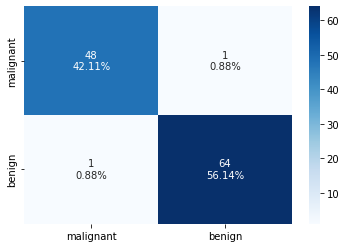

In [39]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_pso_bound.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_pso_bound.flatten()/np.sum(cf_matrix_pso_bound)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_pso_bound, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with PSO_bound\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## The best loss of the Metaheuristic-based optimizers

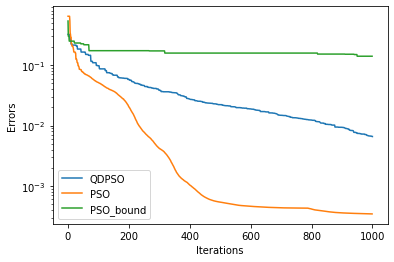

In [19]:
plt.plot(x_qdpso_best, y_qdpso_best, label = 'QDPSO')
plt.plot(x_pso_best, y_pso_best, label = 'PSO')
plt.plot(x_pso_bound_best, y_pso_bound_best, label = 'PSO_bound')
#plt.title("The Best Loss of the Metaheuristic-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
plt.show()

## Adam

### All training

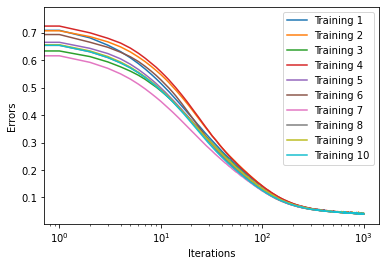

In [20]:
with open ('adam_bc_metric_113_100_1000_30', 'rb') as temp:
    y_adam = pk.load(temp)

x_adam = np.array(range(len(y_adam[0])))

for i in range (len(y_adam)):
    lab = "Training " + str(i+1)
    plt.plot(x_adam, y_adam[i], label = lab)

#plt.title("The Loss of Adam During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.xscale('log')
plt.show()

In [21]:
adam_cost = []
for i in range(len(y_adam)):
    adam_cost.append(y_adam[i][len(y_adam[0]) - 1])

adam_cost = np.array(adam_cost)
mean_adam = np.mean(adam_cost)
std_adam = np.std(adam_cost)
worst_adam = np.max(adam_cost) 
best_adam = np.min(adam_cost)
print("Worst: ", worst_adam, " Mean: ", mean_adam, " Best: ", best_adam, " Std: ", std_adam)
print("Best loss during the training in: ", (adam_cost.tolist()).index(best_adam) + 1)


Worst:  0.040722921178782893  Mean:  0.03983550458467955  Best:  0.03911809897210478  Std:  0.0004829167206642371
Best loss during the training in:  3


### Best training

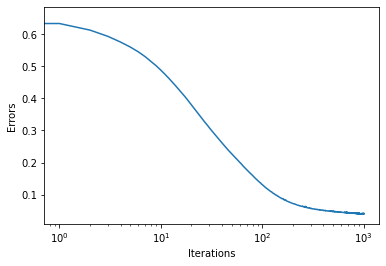

In [22]:
adam_loss_load = y_adam[(adam_cost.tolist()).index(best_adam)]
plt.plot(adam_loss_load)
#plt.title("The Best Loss of Adam Durinng the Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.xscale('log')
plt.show()

### Confussion Matrix

In [40]:
adam_model_load = jb.load('adam_bc_model_113_100_1000_30.sav')
y_test_adam = adam_model_load.predict(X_test)
cf_matrix_adam = confusion_matrix(y_test, y_test_adam)
print(cf_matrix_adam)
print("F1 score weighted: ", f1_score(y_test, y_test_adam, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_adam, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_adam, average='weighted'))

[[46  3]
 [ 1 64]]
F1 score weighted:  0.9648125996810206
Recall score weighted:  0.9649122807017544
Precision score weighted:  0.9653245530466369


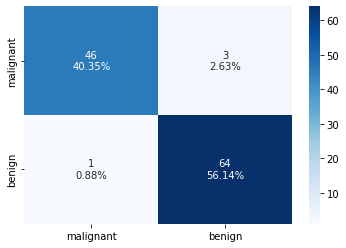

In [41]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_adam.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_adam.flatten()/np.sum(cf_matrix_adam)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_adam, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with Adam\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## L-BFGS

In [25]:
with open ('lbfgs_bc_metric_113_100_1000_30', 'rb') as temp:
    y_lbfgs = pk.load(temp)

lbfgs_cost = np.array(y_lbfgs)
mean_lbfgs = np.mean(lbfgs_cost)
std_lbfgs = np.std(lbfgs_cost)
worst_lbfgs = np.max(lbfgs_cost) 
best_lbfgs = np.min(lbfgs_cost)
print("Worst: ", worst_lbfgs, "Mean: ", mean_lbfgs, ' Best: ', best_lbfgs, " Std: ", std_lbfgs)
print("Best loss during the training in: ", (lbfgs_cost.tolist()).index(best_lbfgs) + 1)

Worst:  0.0018390899981030144 Mean:  0.001698610460711978  Best:  0.0015310316441152587  Std:  0.00011409097897284815
Best loss during the training in:  6


### Confusion Matrix

In [42]:
lbfgs_model_load = jb.load('lbfgs_bc_model_113_100_1000_30.sav')
y_test_lbfgs = lbfgs_model_load.predict(X_test)
cf_matrix_lbfgs = confusion_matrix(y_test, y_test_lbfgs)
print(cf_matrix_lbfgs)
print("F1 score weighted: ", f1_score(y_test, y_test_lbfgs, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_lbfgs, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_lbfgs, average='weighted'))

[[47  2]
 [ 0 65]]
F1 score weighted:  0.9824062998405104
Recall score weighted:  0.9824561403508771
Precision score weighted:  0.9829798376538361


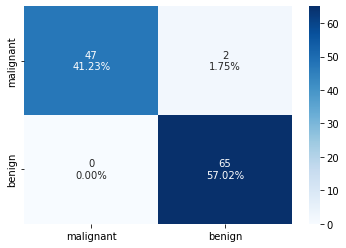

In [43]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_lbfgs.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_lbfgs.flatten()/np.sum(cf_matrix_lbfgs)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_lbfgs, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with L-BFGS\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## SGD

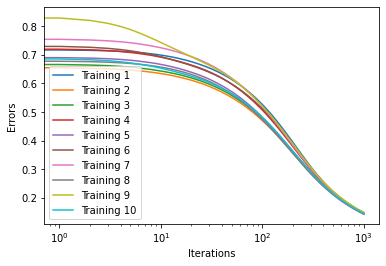

In [28]:
with open ('sgd_bc_metric_113_100_1000_30', 'rb') as temp:
    y_sgd = pk.load(temp)

x_sgd = np.array(range(len(y_sgd[0])))

for i in range (len(y_sgd)):
    lab = "Training " + str(i+1)
    plt.plot(x_sgd, y_sgd[i], label = lab)

#plt.title("The Loss of SGD During Differents Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.xscale('log')
plt.show()

In [29]:
sgd_cost = []
for i in range(len(y_sgd)):
    sgd_cost.append(y_sgd[i][len(y_sgd[0]) - 1])

sgd_cost = np.array(sgd_cost)
mean_sgd = np.mean(sgd_cost)
std_sgd = np.std(sgd_cost)
worst_sgd = np.max(sgd_cost) 
best_sgd = np.min(sgd_cost)
print(" Worst: ", worst_sgd, " Mean: ", mean_sgd, " Best: ", best_sgd, " Std: ", std_sgd)
print("Best loss during the training in: ", (sgd_cost.tolist()).index(best_sgd) + 1)

 Worst:  0.14789816218859908  Mean:  0.14532264268030254  Best:  0.14244292154257543  Std:  0.001792695609480497
Best loss during the training in:  5


### Best Training

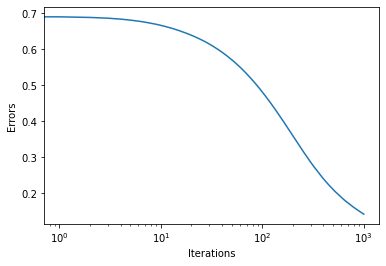

In [30]:
sgd_loss_load = y_sgd[(sgd_cost.tolist()).index(best_sgd)]
plt.plot(sgd_loss_load)
#plt.title("The Best Loss of SGD Durinng the Training")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.xscale('log')
plt.show()

### Confusion Matrix

In [44]:
sgd_model_load = jb.load('sgd_bc_model_113_100_1000_30.sav')
y_test_sgd = sgd_model_load.predict(X_test)
cf_matrix_sgd = confusion_matrix(y_test, y_test_sgd)
print(cf_matrix_sgd)
print("F1 score weighted: ", f1_score(y_test, y_test_sgd, average='weighted'))
print("Recall score weighted: ", recall_score(y_test, y_test_sgd, average='weighted'))
print("Precision score weighted: ", precision_score(y_test, y_test_sgd, average='weighted'))

[[46  3]
 [ 0 65]]
F1 score weighted:  0.9735654926790661
Recall score weighted:  0.9736842105263158
Precision score weighted:  0.97484520123839


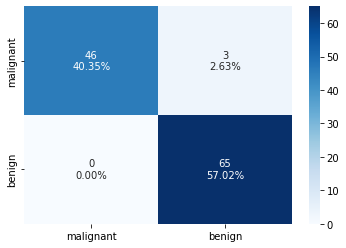

In [45]:
#group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix_sgd.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix_sgd.flatten()/np.sum(cf_matrix_sgd)]

labels = [f"{v1}\n{v2}" for v1, v2 in #\n{v3} , v3
          zip(group_counts, group_percentages)] #group_names,

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix_sgd, annot=labels, fmt='', cmap='Blues')

#ax.set_title('Confusion Matrix of the Breast Dataset with SGD\n\n')
#ax.set_xlabel('\nPredicted Values')
#ax.set_ylabel('True Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['malignant','benign'])
ax.yaxis.set_ticklabels(['malignant','benign'])

## Display the visualization of the Confusion Matrix.
plt.show()

## The best loss of the Gradient-based optimizers

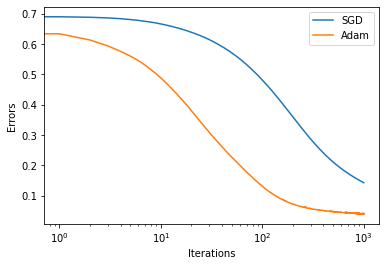

In [33]:
plt.plot(sgd_loss_load, label = 'SGD')
plt.plot(adam_loss_load, label = 'Adam')
#plt.title("The Best Loss of the Gadient-based Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.xscale('log')
plt.show()

## The best loss of the Gradient-based and Metaheuristic-based optimizers

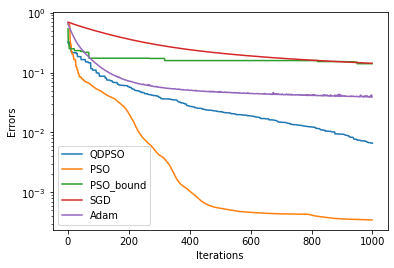

In [34]:
plt.plot(x_qdpso_best, y_qdpso_best, label = 'QDPSO')
plt.plot(x_pso_best, y_pso_best, label = 'PSO')
plt.plot(x_pso_bound_best, y_pso_bound_best, label = 'PSO_bound')

plt.plot(sgd_loss_load, label = 'SGD')
plt.plot(adam_loss_load, label = 'Adam')
#plt.title("The Best Loss of the All Optimizers")
plt.ylabel("Errors")
plt.xlabel("Iterations")
plt.legend()
plt.yscale('log')
#plt.xscale('log')
plt.show()